In [1]:
import numpy as np
from scipy.misc import imread
import glob
from skimage import util 
from skimage import io as io
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
try:
    path = "/Users/cgroschner/Box Sync/Research/Training Data/SegmentedImages_DotNoFringe"    
    path2 = "/Users/cgroschner/Box Sync/Research/Training Data/SegmentedImage_Nothing"

    name = "."
    length1 = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
    length2 = len([name for name in os.listdir(path2) if os.path.isfile(os.path.join(path2, name))])
except:
    path = "/Users/kategroschner/Box Sync/Research/Training Data/SegmentedImages_DotNoFringe"    
    path2 = "/Users/kategroschner/Box Sync/Research/Training Data/SegmentedImage_Nothing"

    name = "."
    length1 = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
    length2 = len([name for name in os.listdir(path2) if os.path.isfile(os.path.join(path2, name))])

path = path + "/*.png"    
path2 = path2 +"/*.png"

label = 1 #to indicate contains particle
label2 = 0 #indicates contains no particle


i = 0
for fname in glob.glob(path):
    #files = io.imread_collection(fname,True)
    im = np.array(imread(fname,flatten=True))
    if i == 0:
        data = np.reshape(im,(1,-1))
        data = np.append(data,np.reshape(np.rot90(im,1),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,2),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,3),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.flipud(im),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.fliplr(im),(1,-1)),axis = 0)
        
    else:
        data = np.append(data,np.reshape(im,(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,1),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,2),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.rot90(im,3),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.flipud(im),(1,-1)),axis = 0)
        data = np.append(data,np.reshape(np.fliplr(im),(1,-1)),axis = 0)
    i = i+1   

In [3]:
j = 0
for fname in glob.glob(path2):
    #files = io.imread_collection(fname,True)
    im = np.array(imread(fname,flatten=True))
    if j == 0:
        data2 = np.reshape(im,(1,-1))     
    else:
        data2 = np.append(data2,np.reshape(im,(1,-1)),axis = 0)
    j = j+1  

In [6]:
target = np.ones([210,])
target2 = np.zeros([1504,])
print(target.shape)
print(target2.shape)

(210,)
(1504,)


In [7]:
total_data = np.concatenate((data,data2),axis = 0)
total_targets = np.concatenate((target,target2),axis =0)

In [8]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(total_data, total_targets, test_size=0.25, random_state=42)

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(data_train,target_train)

/Users/kategroschner/Documents/particleRecognition/venv/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [10]:
from sklearn.metrics import confusion_matrix
prediticions = sgd_clf.predict(data_test)
confusion_matrix(target_test,prediticions)

array([[384,   1],
       [ 13,  31]])

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cross_val_score(sgd_clf,data_train,target_train,cv=3,scoring="accuracy")
target_train_pred = cross_val_predict(sgd_clf,data_train,target_train,cv=3)
confusion_matrix(target_train,target_train_pred)

array([[1100,   19],
       [  26,  140]])

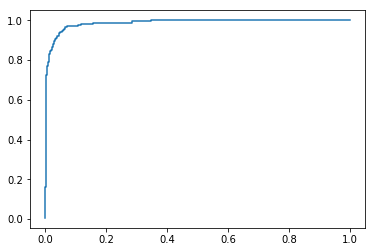

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
target_scores = cross_val_predict(sgd_clf,data_train,target_train,cv=3,method = "decision_function")
if target_scores.ndim ==2:
    target_scores=target_scores[:,1]
precisions, recalls, thresholds = precision_recall_curve(target_train, target_scores)
sgd_fpr, sgd_tpr, sgd_thresholds = roc_curve(target_train, target_scores)
plt.plot(sgd_fpr, sgd_tpr)

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(target_train,target_scores)

0.98678897897218898